In [177]:
# Import Tensorflow so we can use it.
import tensorflow as tf
import sklearn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [178]:
# How to use Tensorflow
# Like in regular algebra, we have variables that will stand for values
#In python
x = 3
# In TF, although this seems convoluted, it is doing the same thing as the above code
x = tf.Variable(3, name="x")
y = tf.Variable(9, name="y")
# variable_name = tf.Variable(value, name="name_given")

In [179]:
# For example, look at the following function
f = x * y + 2

In [180]:
# In TF we have to activate our variables to use them, like so:
init = tf.global_variables_initializer()

In [181]:
# Activate a session
with tf.Session() as sess:
    init.run() # Initialize variables in the session
    result = f.eval() # Store the result of f (x * y + 2) in result. Eval runs the result of f

In [182]:
result

29

In [183]:
# See Slides for explanation of Neural Networks

In [184]:
from sklearn.datasets import fetch_mldata

In [185]:
# Sklearn comes with pre imported datasets, this MNIST dataset is one of the most popular ones
mnist = fetch_mldata("MNIST original")

In [186]:
# Our mnist variable contains our actual data and our labels, X and y
X = mnist["data"]

In [187]:
y = mnist["target"]

In [188]:
# Let's visualise what X and y are
# We check the shape of x and see its a matrix of 70k rows and 784 columns
# This means that we have 70k images
X.shape

(70000, 784)

In [189]:
# Why is y only one array of 70k elements? Our y array has the "result" or "target of each 784 size array
# This means that for every image there is an "answer"
y.shape

(70000,)

In [190]:
# Let's visualize a single digit
# Here we access a random digit located at position 1200
plotting_digit = X[19801]

In [191]:
# We can see each digit is an array of 784
plotting_digit.shape

(784,)

In [192]:
# This is because a digit is a 28x28(784 pixels) image. So basically we have like 70k arrays whose size are 784
# So we have an array of pixels, where the number of the pixel is the intensity of the pixel from [0, 255]

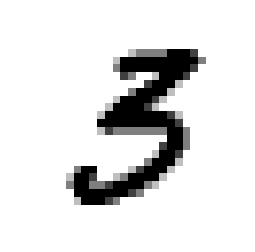

In [193]:
# Remember that if we plot a digit as it is we will see just a line because it is one-dimensional
# So we reshape it to become an image of 28 by 28
plotting_digit_image = plotting_digit.reshape(28, 28)
# Here we set up the plot with our digit
plt.imshow(plotting_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
# Here we hide the axis (because we don't need an x-y orientation)
plt.axis("off")
#Display the plot
plt.show()

In [194]:
# We can see a 3!

In [195]:
# But how does it look actually?
plotting_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 128, 128,
       128, 128, 255, 255, 255, 191,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 25

In [196]:
# If you look from far enough you can kind of see the 3!

In [197]:
# Now lets look at what our results say
# Remember we got the 19801th row so our 19801th row in y should be it's assigned answer

In [198]:
# Great! As you can see, no more arrays, but rather y is an array of 70k numbers. Our answers.
y[19801]

3.0

In [199]:
# Now how are we going to train a neural network?

In [200]:
# We want to train it on our X and then check if they match our Y

In [201]:
# But we should maybe leave some of our elements in X and y to test out if it actually works
# Because it is useless if we test on the data we trained on! The algorithm has to see new data for use to know it's working

In [202]:
# fortunately sklearn has a function that does this for us. It also shuffles the data which is good practice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Above we assign our new testing and training data and split them 80-20 or 0.2*70,000 = 56000

In [204]:
X_train.shape

(56000, 784)

In [205]:
y_train.shape

(56000,)

In [206]:
X_test.shape

(14000, 784)

In [176]:
# Now that we have the data ready let's build the Neural Net!
tf.reset_default_graph()


In [207]:
input_size = X_test[0].size # (784)
size_hidden_layer1 = 200
size_hidden_layer2 = 50
number_outputs = 10

In [208]:
# Declare an X and y variables with their respetive size (X will contain n amount of examples all of size input_size)
# y will contain n answers to the n examples of X
# Our data will be transmitted to the network through X
X = tf.placeholder(tf.float32, shape=(None, input_size), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [209]:
# declare a name for the scope of this block of code (helps with organization)
with tf.name_scope("deep_network"):
    # Declare our first hidden layer. Takes X as an input (our data), of size size_hidde...
    hidden1 = tf.layers.dense(X, size_hidden_layer1, name="hidden1", activation=tf.nn.relu)
    # Declare our second hidden layer. It takes the output of our first hidden layer, of size size_hide...
    hidden2 = tf.layers.dense(hidden1, size_hidden_layer2, name="hidden_layer2", activation=tf.nn.relu)
    # Our third and final layer returns the output and takes in hidden2
    output = tf.layers.dense(hidden2, number_outputs, name="output")


In [210]:
# Declare our loss function that we will use as basis of training
with tf.name_scope("loss_cross_entropy"):
    # We use the cross entropy loss function with softmax as we saw in the slides with our according labels and our results
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=output)
    # Get the mean error from all exapmples so 
    loss = tf.reduce_mean(cross_entropy, name="loss")

In [211]:
# Now we have to declare an optimizer that will act on our loss and tweak the params accordingly

# Declare learning_rate
learning_rate = 0.05

with tf.name_scope("train"):
    # Use the Gradient Descent Optimizer and give it our learning rate (the size of our steps)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training = optimizer.minimize(loss)


In [212]:
# Now we state our measure, that is, what are we aiming for
# In this case we will use accuracy
with tf.name_scope("evaluation"):
    # For each example determine if the prediction (our output) is equal to y (the answer)
    number_of_corrects = tf.nn.in_top_k(output, y, 1)
    # Determine the accuracy of our predictions by computing the mean
    accuracy = tf.reduce_mean(tf.cast(number_of_corrects, tf.float32))

In [213]:
# Remember to initialize our Variables !
init = tf.global_variables_initializer()
save_parameters = tf.train.Saver()

In [ ]:
# Our epochs are the number of times we will run with different batches of data
number_of_epochs = 40
number_of_batches = X_train.shape[0] // 50
number_of_examples_per_batch = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(number_of_epochs):
        # for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
        for batch in range((number_of_batches)):
            X_batch = X_train[(batch*number_of_examples_per_batch): (batch + 1) * number_of_examples_per_batch]
            y_batch = y_train[(batch*number_of_examples_per_batch): (batch + 1) * number_of_examples_per_batch]
            sess.run(training, feed_dict={X: X_batch, y: y_batch})
        accuracy_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Batch accuracy:", accuracy_batch)



In [229]:
from tensorflow.examples.tutorials.mnist import input_data

In [230]:
mnist = input_data.read_data_sets("tmp/data/")

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [231]:
number_of_epochs = 40
number_of_batches = X_train.shape[0] / 50
number_of_examples_per_batch = 50
with tf.Session() as sess:
    init.run()
    for epoch in range(number_of_epochs):
        # for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
        for iteration in range(mnist.train.num_examples // number_of_examples_per_batch):
            X_batch, y_batch = mnist.train.next_batch(number_of_examples_per_batch)
            sess.run(training, feed_dict={X: X_batch, y: y_batch})
        accuracy_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Batch accuracy:", accuracy_batch* 100)



0 Batch accuracy: 93.99999976158142
1 Batch accuracy: 100.0
2 Batch accuracy: 100.0
3 Batch accuracy: 100.0
4 Batch accuracy: 100.0


KeyboardInterrupt: 